# Trabajo Final

## Dayana Andrea Henao Arbeláez

## 1001469185

El propósito principal de este trabajo es comparar el comportamiento caótico del atractor de Lorenz con su comportamiento lineal. Se verificó que para los parámetros $\sigma=10$, $\beta=8/3$ y $\rho=28$ el sistema tiene un comportamiento caótico, y para $\sigma=10$, $\beta=8/3$ y $\rho=96$ muestra órbitas periódicas.

Además, se hace una comparación del movimiento de sistemas resorte/masa libres no amortiguados y amortiguados (sobreamortiguado, críticamente amortiguado, subamotiguado). Se grafican la posición y la velocidad de los sistemas con respecto al tiempo para contrastar su respectivo comportamiento. 

In [972]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
from numpy.linalg import *
import scipy.integrate as integrate
from scipy import misc

# **Sistemas caóticos**

La teoría del caos, más que una teoría, es un paradigma que supuso en su momento una gran revolución científica, al reflejar que muchos sistemas que eran considerados deterministas y previsibles tenían severos límites en dicha previsibilidad. Es decir, que no eran tan útiles como se creía a la hora de predecir eventos futuros. Iniciada por Henri Poincaré y popularizada gracias al trabajo del matemático y meteorólogo Edward Lorenz, la teoría del caos se ha utilizado en campos como las matemáticas y la meteorología para explicar la inexactitud y la dificultad para obtener resultados previsibles de la realidad.

Es importante tener en cuenta que a pesar de las apariencias, el caos al que se refiere esta teoría no implica una falta de orden, sino que los hechos y la realidad no se ajustan a un modelo lineal.

## El atractor de Lorenz 
Es un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.
$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

Donde $\sigma$, $\rho$ y $\beta$ >0, sin embargo, usualmente $\sigma=10$, $\beta=8/3$ y $\rho$ es variable. 

σ es el número de Prandtl, relacionado con la viscosidad del fluido; ρ es el número de Rayleigh, relacionado con la diferencia de temperatura entre la parte superior e inferior de la columna y β es un factor de escalamiento.

El sistema exhibe un comportamiento caótico para $\rho=28$, pero muestra órbitas periódicas para otros valores de $\rho$ como $\rho=99,96.$




**Comportamiento caótico del sistema**
* $\sigma=10$
* $\rho=28$
* $\beta=8/3$

$$\mu(t) = \left( x(t), y(t), z(t) \right)$$

$$f \left( t, \mu \right) = \frac{d \mu}{dt}=\left( \sigma(y-x), x(\rho-z)-y, xy-\beta z \right)$$

In [973]:
# Defino una función para graficar la solución de las ecuaciones que modelan el atractor variando
# las condiciones iniciales
def Lorenz(μ_0:'Matrix', c):

# Parámetros del atractor 
  σ = 10
  ρ = 28
  β = 8/3
  def f(μi, ti):  
    f = np.zeros(3)
    f[0] = σ * (μi[1] - μi[0])
    f[1] = μi[0] * (ρ - μi[2]) - μi[1]
    f[2] = μi[0] * μi[1] - β * μi[2]
    return f

  # Tiempo  
  t = np.linspace(0, 30, 10000)

  # Solución de la ecuación
  μ=integrate.odeint(f, μ_0, t)

  # Gráfica de la solución de las ecuaciones con respecto al tiempo
  fig, ax = plt.subplots(1,1, figsize=(9,8))
  ax.plot(t, μ[:, 0], label='x')
  ax.plot(t, μ[:, 1], label='y')
  ax.plot(t, μ[:, 2], label='z')
  ax.legend()
  ax.grid()
  plt.title(f'Soluciones al sistema de ecuaciones del atractor de Lorenz caótico \n para las condiciones iniciales {μ_0} ', size=14)
  plt.show()

  # Gráfica del atractor 
  fig = plt.figure(figsize=(8,6))
  axis = fig.gca (projection = '3d')
  axis.plot (μ[:, 0], μ[:, 1], μ[:, 2], color=c, linewidth=0.5)
  axis.set_xlabel('x(t)', size=16)
  axis.set_ylabel('y(t)', size=16)
  axis.set_zlabel('z(t)', size=16)
  axis.set_title(f'Gráfico del atractor de Lorenz \n para las condiciones iniciales {μ_0} ', size=18)

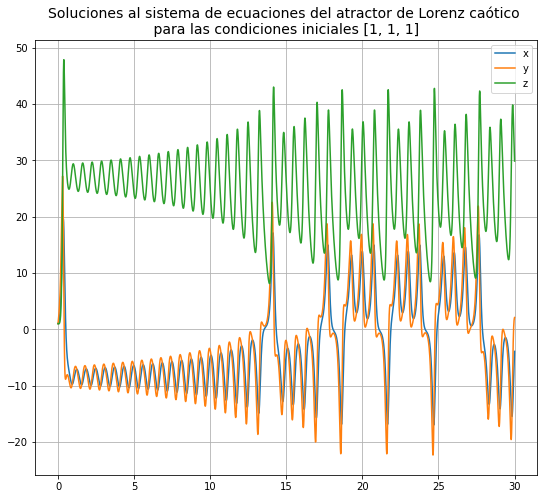

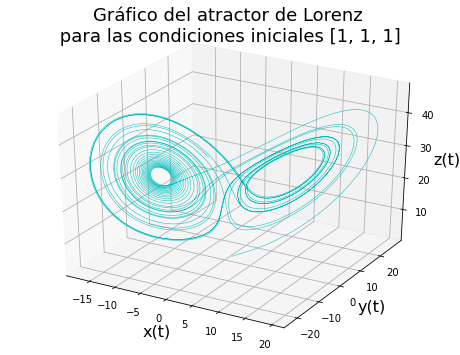

In [974]:
Lorenz([1,1,1],'c')

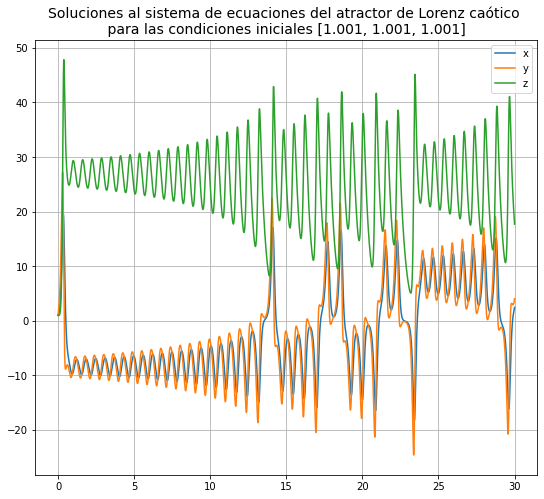

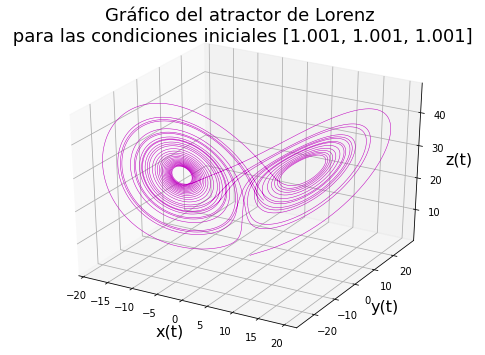

In [975]:
Lorenz([1.001,1.001,1.001],'m')

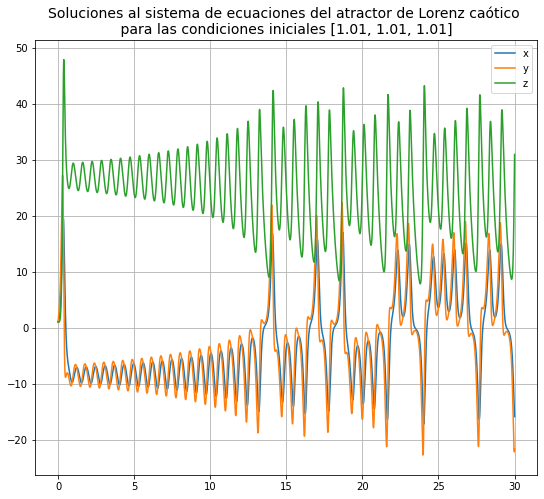

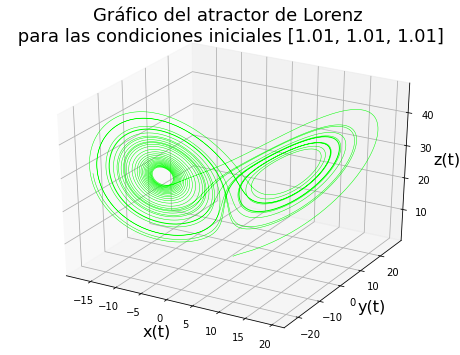

In [976]:
Lorenz([1.01,1.01,1.01],'lime')

Gráfica del atractor de Lorenz con todas las condiciones iniciales estudiadas.

In [977]:
σ = 10
ρ = 28
β = 8/3
def f(μi, ti):  
  f = np.zeros(3)
  f[0] = σ * (μi[1] - μi[0])
  f[1] = μi[0] * (ρ - μi[2]) - μi[1]
  f[2] = μi[0] * μi[1] - β * μi[2]
  return f
  
t = np.linspace(0, 30, 10000)

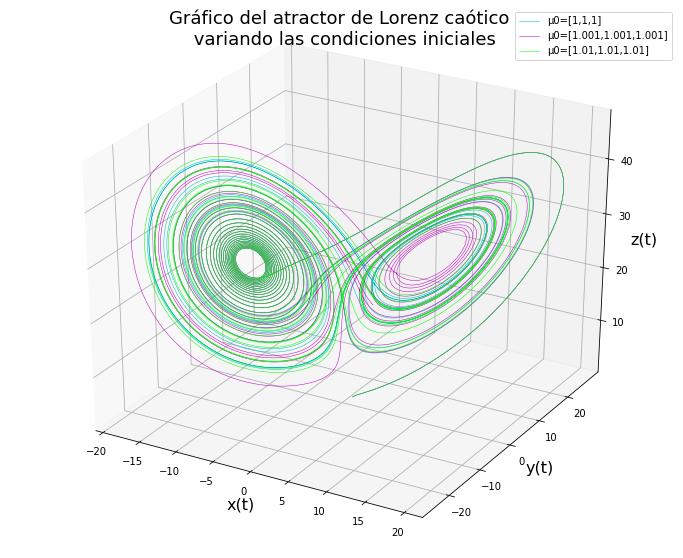

In [978]:
μ=integrate.odeint(f, [1,1,1], t)
μ1=integrate.odeint(f, [1.001,1.001,1.001], t)
μ2=integrate.odeint(f, [1.01,1.01,1.01], t)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(μ[:, 0], μ[:, 1], μ[:, 2], color='c', linewidth=0.5, label='μ0=[1,1,1]')
ax.plot(μ1[:, 0], μ1[:, 1], μ1[:, 2], color='m', linewidth=0.5, label='μ0=[1.001,1.001,1.001]')
ax.plot (μ2[:, 0], μ2[:, 1], μ2[:, 2], color='lime', linewidth=0.5, label='μ0=[1.01,1.01,1.01]')
ax.set_title('Gráfico del atractor de Lorenz caótico \n variando las condiciones iniciales', size=18)
ax.set_xlabel('x(t)', size=16)
ax.set_ylabel('y(t)', size=16)
ax.set_zlabel('z(t)', size=16)
plt.legend()
plt.show()

A partir del gráfico es psible notar como cambia el comportamiento del atractor aunque sea para una variación de 0.001 y 0.01 en las condiciones iniciales.

**Comportamiento lineal del sistema**
* $\sigma=10$
* $\rho=96$
* $\beta=8/3$

$$\mu(t) = \left( x(t), y(t), z(t) \right)$$

$$f \left( t, \mu \right) = \frac{d \mu}{dt}=\left( \sigma(y-x), x(\rho-z)-y, xy-\beta z \right)$$



In [979]:
# Se hace lo mismo que en la parte anterior, lo único que cambia es el parámetro ρ. 
def Lorenz(μ_0:'Matrix', c):

  σ = 10
  ρ = 96
  β = 8/3
  def f(μi, ti):  
    f = np.zeros(3)
    f[0] = σ * (μi[1] - μi[0])
    f[1] = μi[0] * (ρ - μi[2]) - μi[1]
    f[2] = μi[0] * μi[1] - β * μi[2]
    return f
    
  t = np.linspace(0, 30, 10000)
  μ=integrate.odeint(f, μ_0, t)

  fig, ax = plt.subplots(1,1, figsize=(9,8))
  ax.plot(t, μ[:, 0], label='x')
  ax.plot(t, μ[:, 1], label='y')
  ax.plot(t, μ[:, 2], label='z')
  ax.legend()
  ax.grid()
  plt.title(f'Soluciones al sistema de ecuaciones del atractor de Lorenz lineal \n para las condiciones iniciales {μ_0} ', size=14)
  plt.show()

  fig = plt.figure(figsize=(8,6))
  axis = fig.gca (projection = '3d')
  axis.plot (μ[:, 0], μ[:, 1], μ[:, 2], color=c, linewidth=0.5)
  axis.set_xlabel('x(t)', size=16)
  axis.set_ylabel('y(t)', size=16)
  axis.set_zlabel('z(t)', size=16)
  axis.set_title(f'Gráfico del atractor de Lorenz \n para las condiciones iniciales {μ_0} ', size=18)

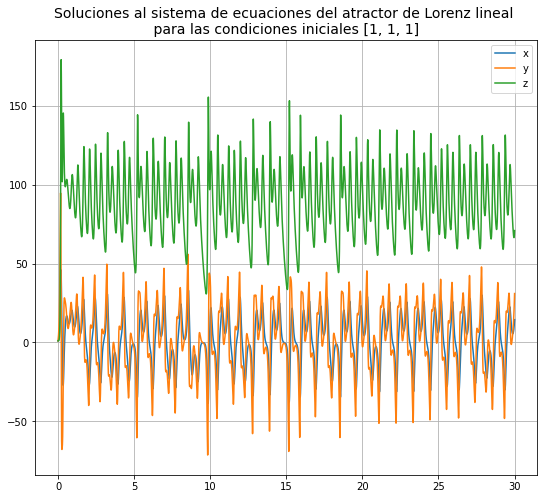

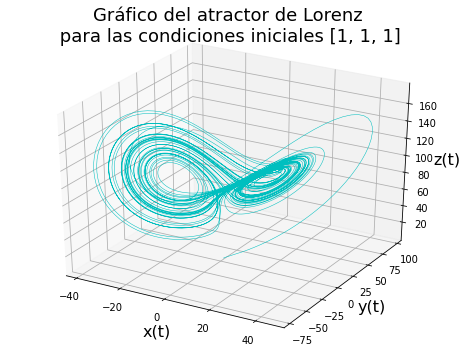

In [980]:
Lorenz([1,1,1],'c')

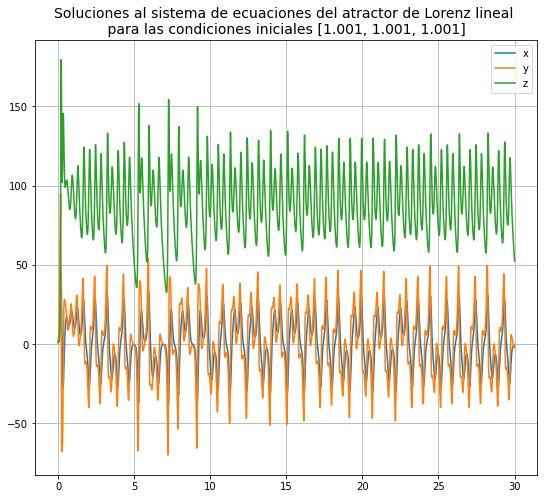

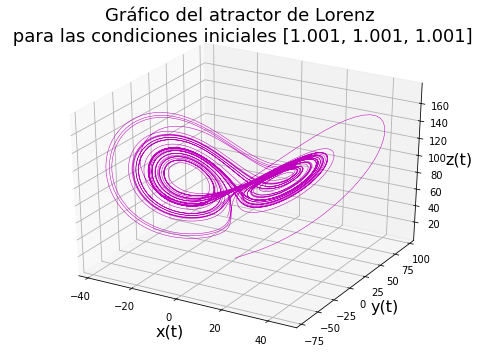

In [981]:
Lorenz([1.001,1.001,1.001],'m')

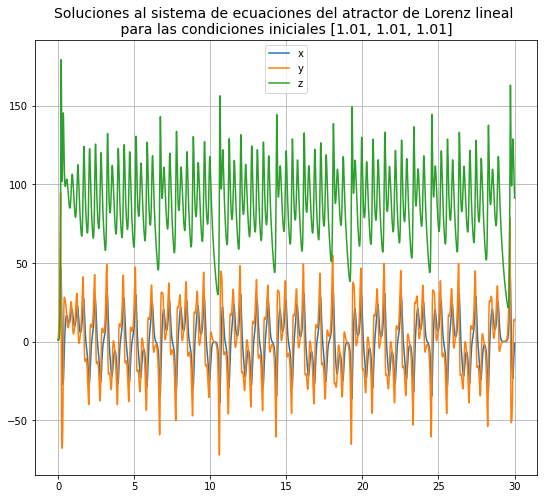

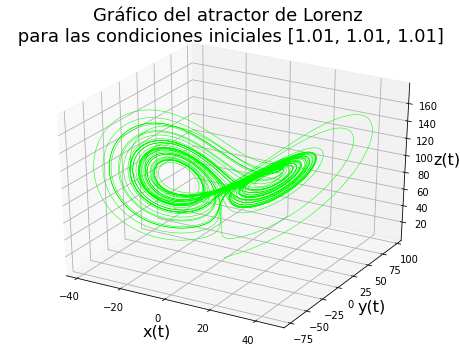

In [982]:
Lorenz([1.01,1.01,1.01],'lime')

Gráfica del atractor de Lorenz con todas las condiciones iniciales estudiadas.

In [983]:
σ = 10
ρ = 96
β = 8/3
def f(μi, ti):  
  f = np.zeros(3)
  f[0] = σ * (μi[1] - μi[0])
  f[1] = μi[0] * (ρ - μi[2]) - μi[1]
  f[2] = μi[0] * μi[1] - β * μi[2]
  return f
  
t = np.linspace(0, 30, 10000)

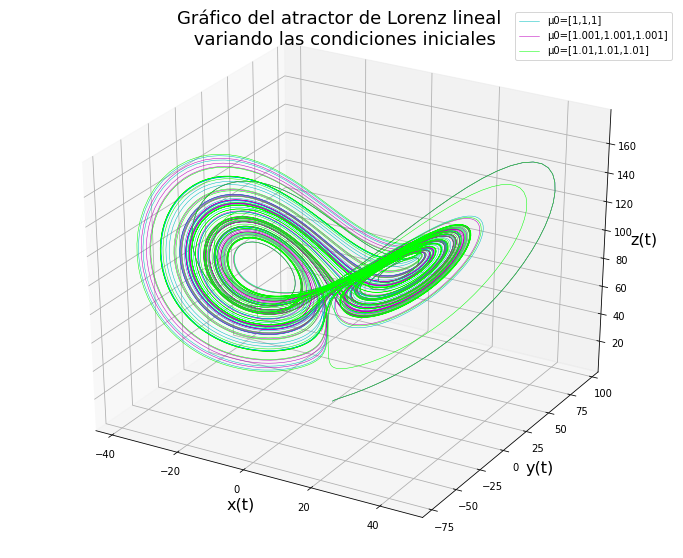

In [984]:
μ=integrate.odeint(f, [1,1,1], t)
μ1=integrate.odeint(f, [1.001,1.001,1.001], t)
μ2=integrate.odeint(f, [1.01,1.01,1.01], t)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(μ[:, 0], μ[:, 1], μ[:, 2], color='c', linewidth=0.5, label='μ0=[1,1,1]')
ax.plot(μ1[:, 0], μ1[:, 1], μ1[:, 2], color='m', linewidth=0.5, label='μ0=[1.001,1.001,1.001]')
ax.plot (μ2[:, 0], μ2[:, 1], μ2[:, 2], color='lime', linewidth=0.5, label='μ0=[1.01,1.01,1.01]')
ax.set_title('Gráfico del atractor de Lorenz lineal \n variando las condiciones iniciales', size=18)
ax.set_xlabel('x(t)', size=16)
ax.set_ylabel('y(t)', size=16)
ax.set_zlabel('z(t)', size=16)
plt.legend()
plt.show()

A partir del gráfico se puede notar que a pesar del cambio en las condiciones iniciales, el atractor muestra orbitas periódicas. 

#**Sistemas Resorte/Masa**

## Comparación de un movimiento libre no amortiguado y movimiento libre amortiguado

La ecuación diferencial de un movimiento libre no amortiguado es $x''+w^{2}x=0$, donde $w^{2}=\frac{k}{m}$, y la ecuación diferencial de un movimiento libre amortiguado es $x''+2λx'+w^{2}x=0$, donde $2λ=\frac{β}{m}$ y $w^{2}=\frac{k}{m}$ 

*Sistema sobreamortiguado 
$β>w$*

In [985]:
# Definición de los parámetros 
k=1
β=1.25
m=1
w=1
λ=β/m
w=np.sqrt(k/m)

In [986]:
# Solución de la ecuación diferencial para el 
# movimiento libre no amortiguado 
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            - (w**2)*x]

U0_ = [1, 1]
xs_ = np.linspace(0, 15, 100)
Us_ = integrate.odeint(dU_dx, U0_, xs_)

In [987]:
# Solución de la ecuación diferencial para el 
# movimiento libre amortiguado 
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            -(2*λ)*z - (w**2)*x]

U0 = [1, 1]
xs = np.linspace(0, 15, 100)
Us = integrate.odeint(dU_dx, U0, xs)

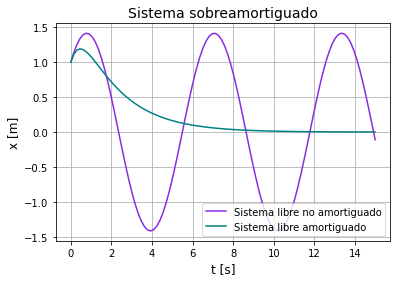

In [988]:
# Gráfica de la posición respecto al tiempo
ys = Us[:,0]
ys_= Us_[:,0]

plt.plot(xs_,ys_, label='Sistema libre no amortiguado', color='blueviolet')
plt.plot(xs,ys, label='Sistema libre amortiguado', color='teal')
plt.title('Sistema sobreamortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("x [m]", size=12)
plt.grid()
plt.legend()

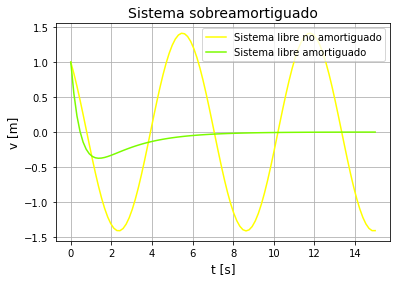

In [989]:
# Gráfica de la velocidad respecto al tiempo
ys1 = Us[:,1]
ys1_= Us_[:,1]

plt.plot(xs_,ys1_, label='Sistema libre no amortiguado', color='yellow')
plt.plot(xs,ys1, label='Sistema libre amortiguado ', color='lawngreen')
plt.title('Sistema sobreamortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("v [m]", size=12)
plt.grid()
plt.legend()

Sistema Críticamente amortiguado $β=w$

In [990]:
# Se hace lo mismo que en la parte anterior pero se varía β
k=1
β=0.5
m=1
w=0.5
λ=β/m
w=np.sqrt(k/m)

In [991]:
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            - (w**2)*x]

U0_ = [1, 1]
xs_ = np.linspace(0, 15, 100)
Us_ = integrate.odeint(dU_dx, U0_, xs_)

In [992]:
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            -(2*λ)*z - (w**2)*x]

U0c = [1, 1]
xsc = np.linspace(0, 15, 100)
Usc = integrate.odeint(dU_dx, U0c, xsc)

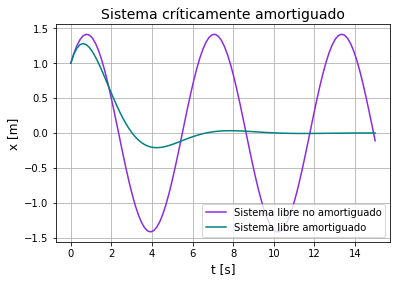

In [993]:
ysc = Usc[:,0]
ys_= Us_[:,0]

plt.plot(xs_,ys_, label='Sistema libre no amortiguado', color='blueviolet')
plt.plot(xsc,ysc, label='Sistema libre amortiguado ', color='teal')
plt.title('Sistema críticamente amortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("x [m]", size=12)
plt.grid()
plt.legend()

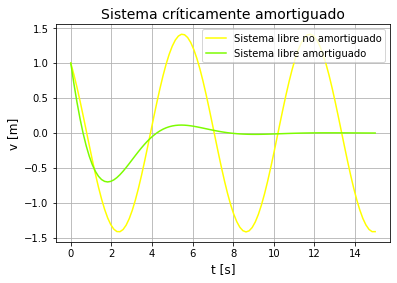

In [994]:
ysc1 = Usc[:,1]
ys1_= Us_[:,1]

plt.plot(xs_,ys1_, label='Sistema libre no amortiguado', color='yellow')
plt.plot(xsc,ysc1, label='Sistema libre amortiguado ', color='lawngreen')
plt.title('Sistema críticamente amortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("v [m]", size=12)
plt.grid()
plt.legend()

Sistema subamortiguado $β<w$

In [995]:
k=1
β=1
m=1
w=1
λ=β/m
w=np.sqrt(k/m)

In [996]:
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            - (w**2)*x]

U0_ = [1, 1]
xs_ = np.linspace(0, 15, 100)
Us_ = integrate.odeint(dU_dx, U0_, xs_)

In [997]:
def dU_dx(U, t):
  
    x,z=U 
    return [        z, 
            -(2*λ)*z - (w**2)*x]

U0s = [1, 1]
xss = np.linspace(0, 15, 100)
Uss = integrate.odeint(dU_dx, U0, xs)

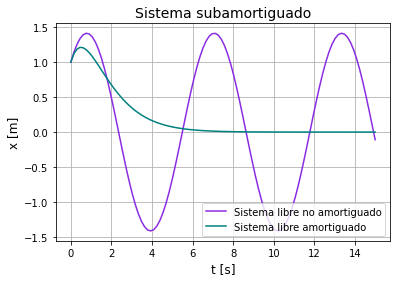

In [998]:
yss = Uss[:,0]
ys_= Us_[:,0]

plt.plot(xs_,ys_, label='Sistema libre no amortiguado', color='blueviolet')
plt.plot(xss,yss, label='Sistema libre amortiguado ', color='teal')
plt.title('Sistema subamortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("x [m]", size=12)
plt.grid()
plt.legend()

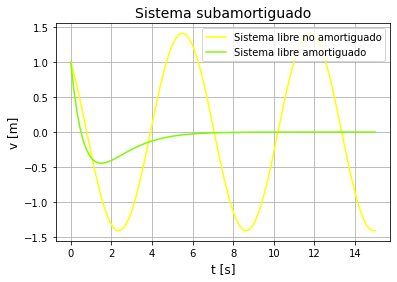

In [999]:
yss1 = Uss[:,1]
ys1_= Us_[:,1]

plt.plot(xs_,ys1_, label='Sistema libre no amortiguado', color='yellow')
plt.plot(xss,yss1, label='Sistema libre amortiguado ', color='lawngreen')
plt.title('Sistema subamortiguado', size=14)
plt.xlabel("t [s]", size=12)
plt.ylabel("v [m]", size=12)
plt.grid()
plt.legend()

Comparando los movimientos amortiguados 

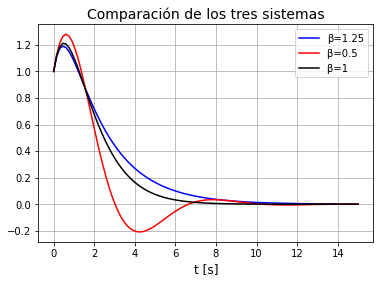

In [1000]:
t=np.linspace(0,15,100)
plt.plot(t,ys, color='blue', label='β=1.25')
plt.plot(t,ysc, color='r', label='β=0.5 ')
plt.plot(t,yss, color='k', label='β=1 ')
plt.title('Comparación de los tres sistemas', size=14)
plt.xlabel("t [s]", size=12)
plt.grid()
plt.legend()

**Referencias**

*  Colaboradores de Wikipedia. (2021b, noviembre 27). Atractor de Lorenz. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Atractor_de_Lorenz#:%7E:text=El%20atractor%20de%20Lorenz%20es,din%C3%A1micas%20de%20la%20atm%C3%B3sfera%20terrestre.

*   Colaboradores de Wikipedia. (2022, 20 enero). Teoría del caos. Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Teor%C3%ADa_del_caos

*   Briega, L. R. E. (2020, 26 marzo). Sistemas dinámicos, Complejidad y Caos con Python. Raul E. Lopez Briega Matemáticas, Análisis de Datos y Python. https://relopezbriega.github.io/blog/2020/03/26/sistemas-dinamicos-complejidad-y-caos-con-python/

*   Oscilaciones amortiguadas (GIE). (2022). Oscilaciones amortiguadas (GIE). http://laplace.us.es/wiki/index.php/Oscilaciones_amortiguadas_(GIE)#Amortiguamiento




